In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib notebook

In [2]:
pd.set_option('display.max_columns', 300)

In [3]:
train_full = pd.read_csv('./datasets/kaggle-house-prices-train.csv')
kaggle = pd.read_csv('./datasets/kaggle-house-prices-test.csv')

Nous choisissons la feature "Neighborhood" en sus de la variable "Surface" <br />
On crée la variable "Surface":

In [4]:
train_full['Surface'] = train_full['TotalBsmtSF'] + train_full['GrLivArea']
kaggle['Surface'] = kaggle['TotalBsmtSF'] + kaggle['GrLivArea']

On élimine les lignes avec des vameurs manquantes pour "Neighborhood"

In [5]:
train_full = train_full.fillna(0)
kaggle = kaggle.fillna(0)

On plot le prix en fonction de la surface totale en colorant par "Neighborhood"

<IPython.core.display.Javascript object>


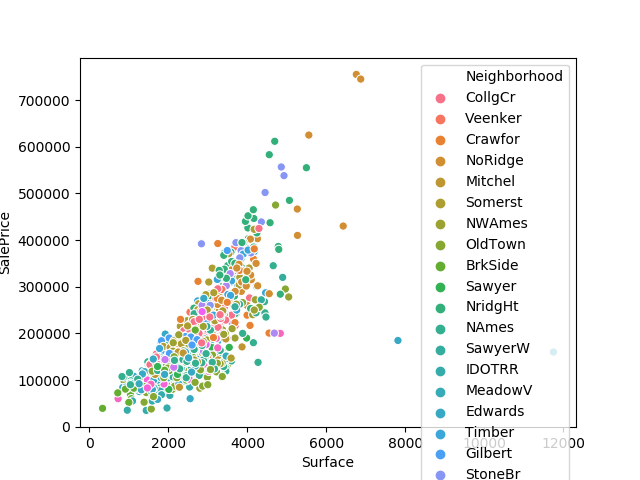

In [6]:
sns.scatterplot(x=train_full['Surface'],
                y=train_full['SalePrice'], hue=train_full['Neighborhood'])

Suite au scatterplot, on choisi de supprimer les données dont la surface est supérieure à 7000

In [7]:
kept_surface = train_full['Surface'] < 7000
# train_full = train_full[kept_surface][['SalePrice', 'GrLivArea', 'Surface', 'Neighborhood']]
train_full = train_full[kept_surface]

Pour intégrer les variables catégorielles, on peut les "séparer" en autant de colones que de catégorie par variables remplies par des `0` si la catégrie ne match pas et `1` si la catégorie match... <br />
fonction `get_dummies` de Pandas

In [8]:
train_full_save = pd.DataFrame()
train_full_save['Neighborhood'] = train_full['Neighborhood']
kaggle_save = pd.DataFrame()
kaggle_save['Neighborhood'] = kaggle['Neighborhood']

train_full = pd.get_dummies(train_full)
train_full['Neighborhood'] = train_full_save['Neighborhood']
kaggle = pd.get_dummies(kaggle)
kaggle['Neighborhood'] = kaggle_save['Neighborhood']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    train_full, train_full['SalePrice'], test_size=0.2, random_state=42)

In [10]:
def calc_SmPrice(row):
    row['SmPrice'] = row['SalePrice']/row['GrLivArea']
    return row['SmPrice']

def get_SmPrice(df):
    nb_sm_prices = dict()
    for nb in df.Neighborhood.unique():
        rows = df.loc[df['Neighborhood']==nb]
        rows['SmPrice'] = rows.apply(calc_SmPrice, axis=1)
        nb_sm_prices.update({str(nb): rows['SmPrice'].mean().astype(np.int64)})
    return nb_sm_prices

def set_NbSmPrice(row):
    row['NbSmPrice'] = smprices.get(row['Neighborhood'])
    return row['NbSmPrice']

In [11]:
smprices = get_SmPrice(X_train)
X_train['NbSmPrice'] = X_train.apply(set_NbSmPrice, axis=1)

C:\Users\utilisateur\.conda\envs\CV\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\utilisateur\.conda\envs\CV\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
X_test['NbSmPrice'] = X_test.apply(set_NbSmPrice, axis=1)

C:\Users\utilisateur\.conda\envs\CV\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
kaggle['NbSmPrice'] = kaggle.apply(set_NbSmPrice, axis=1)

In [14]:
X_train = X_train.drop(['SalePrice', 'Neighborhood'], axis=1)

In [15]:
X_test = X_test.drop(['SalePrice', 'Neighborhood'], axis=1)

In [16]:
# X_train.to_csv('./datasets/x_train_formatted.csv', index=False)
# X_test.to_csv('./datasets/x_test_formatted.csv', index=False)

In [17]:
# y_train.to_csv('./datasets/y_train.csv', index=False)
# y_test.to_csv('./datasets/y_test.csv', index=False)

In [18]:
kaggle = kaggle.drop(['Neighborhood'], axis=1)

In [19]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [20]:
from tensorflow.keras.layers import Input
model.add(Input(shape=X_train.shape[1]))

In [21]:
from tensorflow.keras.layers import Dense
model.add(Dense(X_train.shape[1]*4, activation='relu'))
model.add(Dense(X_train.shape[1]*3, activation='relu'))
model.add(Dense(X_train.shape[1]*2, activation='relu'))
model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [22]:
from tensorflow.keras.optimizers import Adam
LEARNING_RATE = 0.001
model.compile(loss='mse', optimizer=Adam(lr=LEARNING_RATE))

In [23]:
missing_col = list(set(X_train.columns) - set(kaggle.columns))

for col in missing_col:
    kaggle[col] = 0
kaggle = kaggle[X_train.columns]

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

In [26]:
kaggle = scaler.transform(kaggle)

In [27]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_scaler = StandardScaler()
y_train_log = np.array(y_train_log).reshape(-1, 1)
y_test_log = np.array(y_test_log).reshape(-1, 1)

In [28]:
y_scaler.fit(y_train_log)
y_train_log_scaled = y_scaler.transform(y_train_log)
y_test_log_scaled = y_scaler.transform(y_test_log)

In [29]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 200 # how many iterations over the whole dataset
history = model.fit(X_train, y_train_log_scaled, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1166 samples
Epoch 1/200
1166/1166 [==============================] - 1s 940us/sample - loss: 1.1679
Epoch 2/200
1166/1166 [==============================] - 0s 178us/sample - loss: 2.4498
Epoch 3/200
1166/1166 [==============================] - 0s 193us/sample - loss: 2.6073
Epoch 4/200
1166/1166 [==============================] - 0s 176us/sample - loss: 0.7331
Epoch 5/200
1166/1166 [==============================] - 0s 201us/sample - loss: 0.5729
Epoch 6/200
1166/1166 [==============================] - 0s 168us/sample - loss: 0.6443
Epoch 7/200
1166/1166 [==============================] - 0s 165us/sample - loss: 0.5487
Epoch 8/200
1166/1166 [==============================] - 0s 192us/sample - loss: 0.3439
Epoch 9/200
1166/1166 [==============================] - 0s 195us/sample - loss: 0.1832
Epoch 10/200
1166/1166 [==============================] - 0s 228us/sample - loss: 0.1887
Epoch 11/200
1166/1166 [==============================] - 0s 187us/sample - loss: 0.2664
Epoch 12

Epoch 93/200
1166/1166 [==============================] - 0s 203us/sample - loss: 0.0045
Epoch 94/200
1166/1166 [==============================] - 0s 193us/sample - loss: 0.0043
Epoch 95/200
1166/1166 [==============================] - 0s 180us/sample - loss: 0.0042
Epoch 96/200
1166/1166 [==============================] - 0s 181us/sample - loss: 0.0040
Epoch 97/200
1166/1166 [==============================] - 0s 182us/sample - loss: 0.0038
Epoch 98/200
1166/1166 [==============================] - 0s 172us/sample - loss: 0.0037
Epoch 99/200
1166/1166 [==============================] - 0s 163us/sample - loss: 0.0035
Epoch 100/200
1166/1166 [==============================] - 0s 196us/sample - loss: 0.0034
Epoch 101/200
1166/1166 [==============================] - 0s 171us/sample - loss: 0.0032
Epoch 102/200
1166/1166 [==============================] - 0s 171us/sample - loss: 0.0031
Epoch 103/200
1166/1166 [==============================] - 0s 186us/sample - loss: 0.0029
Epoch 104/200
116

Epoch 182/200
1166/1166 [==============================] - 0s 161us/sample - loss: 1.6274e-04
Epoch 183/200
1166/1166 [==============================] - 0s 175us/sample - loss: 1.2344e-04
Epoch 184/200
1166/1166 [==============================] - 0s 173us/sample - loss: 8.9296e-05
Epoch 185/200
1166/1166 [==============================] - 0s 198us/sample - loss: 6.9766e-05
Epoch 186/200
1166/1166 [==============================] - 0s 195us/sample - loss: 6.7064e-05
Epoch 187/200
1166/1166 [==============================] - 0s 178us/sample - loss: 7.7643e-05
Epoch 188/200
1166/1166 [==============================] - 0s 167us/sample - loss: 9.5737e-05
Epoch 189/200
1166/1166 [==============================] - 0s 177us/sample - loss: 1.1504e-04
Epoch 190/200
1166/1166 [==============================] - 0s 171us/sample - loss: 1.3355e-04
Epoch 191/200
1166/1166 [==============================] - 0s 185us/sample - loss: 1.4918e-04
Epoch 192/200
1166/1166 [==============================] - 0

In [30]:
y_predict = model.predict(X_test)

<IPython.core.display.Javascript object>


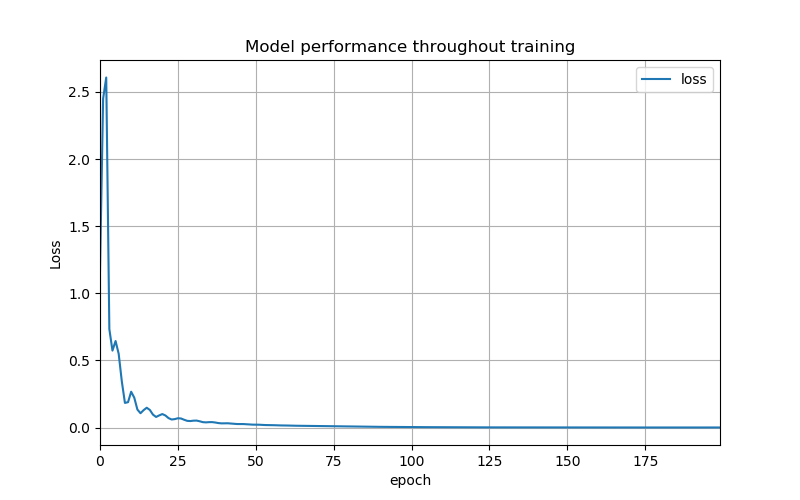

RMSLE :  0.133199538080031
MAE :  15943.272621468323


In [31]:
y_predict_rescaled = np.exp(y_scaler.inverse_transform(y_predict))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

print('RMSLE : ', np.sqrt(metrics.mean_squared_log_error(y_test, y_predict_rescaled)))
print('MAE : ', metrics.mean_absolute_error(y_test, y_predict_rescaled))

In [32]:
sub = pd.DataFrame()
ids = [i+1461 for i in range(1459)]
sub['Id'] = ids

In [33]:
y_predict = model.predict(kaggle)

In [34]:
sub['SalePrice'] = np.exp(y_scaler.inverse_transform(y_predict))

In [35]:
sub.to_csv('subsub.csv', index=False)